In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor









df= pd.read_csv('profiles.csv')




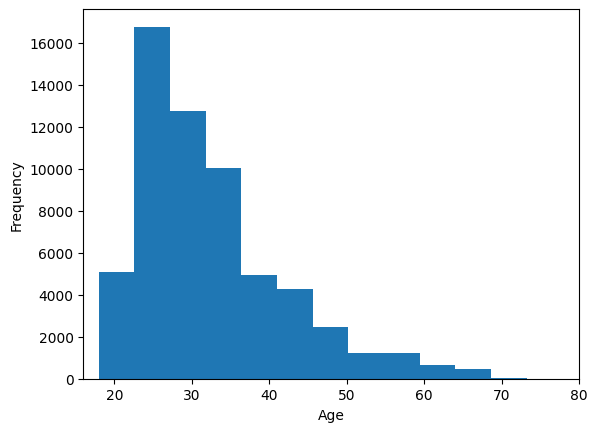

In [3]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [4]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [5]:
print(df.body_type.unique())

['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


In [6]:
# understanding the column ethnicity
print(df.status.unique())
df.ethnicity.value_counts()


['single' 'available' 'seeing someone' 'married' 'unknown']


white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64

In [8]:
df = pd.read_csv('profiles.csv').copy()

# encoding the education column
degree = ["working on college/university", "graduated from college/university", "graduated from masters program", "graduated from law school", "graduated from two-year college", "graduated from med school", "masters program", "law school", "med school"]

education_coded = df.education.apply(lambda x: 1 if x in degree else 0)
df["education_encoded"] = education_coded


df.education_encoded.value_counts()

1    41897
0    18049
Name: education_encoded, dtype: int64

In [9]:
# encoding the ethnicity column
ethnicity = df['ethnicity']
ethnicity_coded = ethnicity.copy()
for i in range(len(ethnicity_coded)):
    if ethnicity_coded[i] == 'white':
        ethnicity_coded[i] = 1
    elif ethnicity_coded[i] == 'black':
        ethnicity_coded[i] = 2
    elif ethnicity_coded[i] == 'asian':
        ethnicity_coded[i] = 3
    elif ethnicity_coded[i] == 'hispanic or latino':
        ethnicity_coded[i] = 4
    else:
        ethnicity_coded[i] = 0
ethnicity_coded = ethnicity_coded.astype(int)
df['ethnicity_encoded'] = ethnicity_coded





In [10]:
# encoding the drugs column
drugs_mapping= {'never' : 0, 'sometimes' : 1, 'often' : 2}
df['drugs_encoded'] = df.drugs.map(drugs_mapping)




In [11]:
# encoding the essay column
essay_cols= ['essay0', 'essay1']
df[essay_cols]= df[essay_cols].replace(np.nan, '', regex=True)
all_essays= df[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df['all_essays']= all_essays.apply(lambda x: len(x))



In [13]:
#Encode the value of "job" into an integer within "job_encoded":
le = LabelEncoder()
le.fit(df["job"])
df["job_encoded"] = le.transform(df["job"])




In [14]:
# getting the features and labels
features = df[['education_encoded', 'ethnicity_encoded', 'drugs_encoded']]
income = df.income
features= features.join(income)
features = features.dropna(subset=['drugs_encoded'])


#Putting income into a separate variable & remove income from features so data can be normalized
income= features.income
features.drop('income', axis=1, inplace=True)



#normalize the features and labels:
x = features
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
 
feature_data = pd.DataFrame(x_scaled, columns=features.columns)


train_data = feature_data
train_labels = income


In [16]:
# splitting the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# training the model
model = RandomForestClassifier()
model.fit(train_data, train_labels)



In [23]:
#Evaluate the model
print(model.score(test_data, test_labels))






0.7989971659036407
